<p><font align = 'justify' size="10" color="Pink" face="Calibri" color="RedOrange">Homework9</font></p>

In [1]:
!pip install bootstrapped

  Preparing metadata (setup.py) ... done
  Created wheel for bootstrapped: filename=bootstrapped-0.0.2-py2.py3-none-any.whl size=13932 sha256=68d4fad46065e14cc5b78fc4764f98785ceb1461e2c0f58821a7056e4db9c46a
  Stored in directory: /root/.cache/pip/wheels/63/89/c7/09fd0b2ce6a69f0b5884df971b0de884500fe20837a8a3ab7f
Successfully built bootstrapped


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import chi2_contingency as chi2
import math
import statistics

import matplotlib.pyplot as plt
import seaborn as sns

import bootstrapped.bootstrap as bs
import bootstrapped.compare_functions as bs_compare
import bootstrapped.stats_functions as bs_stats

In [3]:
def out_text(text):
    print("\033[1m\033[32m\033[43m{}\033[0m".format(text))

<p><font align = 'justify' size="8" color="Orange" face="Calibri" color="RedOrange">Task</font></p>

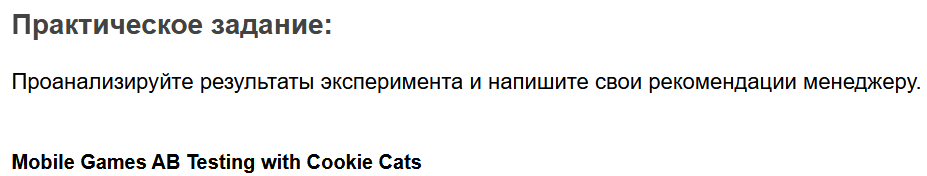

https://docs.google.com/spreadsheets/d/1-GA-TE6gTeV6hJiDDBNJLc9aOadzmdFDdIJSUtR4xgk/edit#gid=1733885895

https://www.kaggle.com/code/mursideyarkin/mobile-games-ab-testing-with-cookie-cats/input

<p><font align = 'justify' size="8" color="Green" face="Calibri" color="RedOrange">Import data</font></p>

In [4]:
df_retention_url = 'https://docs.google.com/spreadsheets/d/1lxTv3Yi8FlnjXM5QPRG49Hb-tt2dkt-eezoQQqxk-YQ/export?format=csv&gid=1733885895'

In [5]:
df_retention = pd.read_csv(df_retention_url)

<p><font align = 'justify' size="8" color="Green" face="Calibri" color="RedOrange">Exploratory Data Analysis (EDA)</font></p>

In [6]:
# Описание таблиц
out_text('RETENTION')
df_retention.info()
print()

RETENTION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB



In [7]:
print(df_retention.groupby(by='userid').sum()[['sum_gamerounds']].sort_values(by='sum_gamerounds', ascending=False))

         sum_gamerounds
userid                 
6390605           49854
871500             2961
3271615            2640
4832608            2438
5346171            2294
...                 ...
6610805               0
2639282               0
6608718               0
6604544               0
4995815               0

[90189 rows x 1 columns]


<ipython-input-7-07da72a05dbc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df_retention.groupby(by='userid').sum()[['sum_gamerounds']].sort_values(by='sum_gamerounds', ascending=False))


<Axes: >

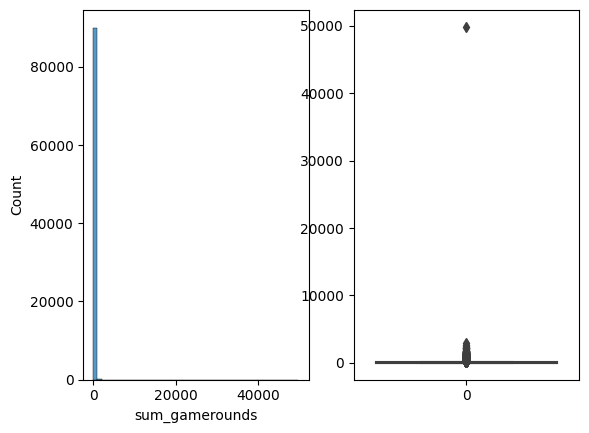

In [8]:
plt.subplot(1, 2, 1)
sns.histplot(data=df_retention, x='sum_gamerounds', bins=50)
plt.subplot(1, 2, 2)
sns.boxplot(data=df_retention['sum_gamerounds'])

<p><font align = 'justify' size="8" color="Green" face="Calibri" color="RedOrange">Transforming data</font></p>

In [9]:
# Удаление выбросов
sum_of_retention_users = df_retention['userid'].nunique()
sum_of_retention_users_str = str(sum_of_retention_users)
df_retention_cut = df_retention[df_retention['sum_gamerounds'] < 300]
sum_of_retention_cut_users = df_retention_cut['userid'].nunique()
sum_of_retention_cut_users_str = str(sum_of_retention_cut_users)

out_text('DATA FULL USERS')
print(sum_of_retention_users_str)
out_text('DATA CUT USERS')
print(sum_of_retention_cut_users_str)

sum_of_cut_outliers = df_retention['userid'].nunique() - df_retention_cut['userid'].nunique()
outliers_number_str = str(sum_of_cut_outliers)
share_of_outliers = sum_of_cut_outliers/df_retention['userid'].nunique()*100
share_of_outliers = round(share_of_outliers, 2)
outliers_share_str = ' (' + str(share_of_outliers) + '%)'
out_text('OUTLIERS')
print(outliers_number_str + outliers_share_str)

DATA FULL USERS
90189
DATA CUT USERS
87497
OUTLIERS
2692 (2.98%)


In [10]:
df_fantom_users = df_retention_cut[(df_retention_cut['retention_7'] > 0) & (df_retention_cut['retention_1'] == 0)]
out_text('FANTOM USERS')
sum_of_fantom_users = df_fantom_users['userid'].nunique()
sum_of_fantom_users_str = str(sum_of_fantom_users)

share_of_fantom_users = (sum_of_fantom_users/sum_of_retention_users)*100
share_of_fantom_users = round(share_of_fantom_users, 2)
share_of_fantom_users_str = ' (' + str(share_of_fantom_users) + '%)'

print(sum_of_fantom_users_str + share_of_fantom_users_str)

FANTOM USERS
3486 (3.87%)


In [11]:
drop_index = df_retention_cut[(df_retention_cut['retention_7'] > 0) & (df_retention_cut['retention_1'] == 0)].index
df_clean = df_retention_cut.drop(index=drop_index)
sum_of_clean_users = df_clean['userid'].nunique()
sum_of_clean_users_str = str(sum_of_clean_users)

out_text('CLEAN DATA USERS')
print(sum_of_clean_users_str)

out_text('SHARE OF CLEAN USERS')
share_of_clean_data = (sum_of_clean_users/sum_of_retention_users)*100
share_of_clean_data = round(share_of_clean_data, 2)
share_of_clean_data_str = str(share_of_clean_data)
share_of_clean_users_str = sum_of_retention_users_str + '/' + sum_of_clean_users_str + ' = ' + share_of_clean_data_str + '%'
print(share_of_clean_users_str)

CLEAN DATA USERS
84011
SHARE OF CLEAN USERS
90189/84011 = 93.15%


<Axes: >

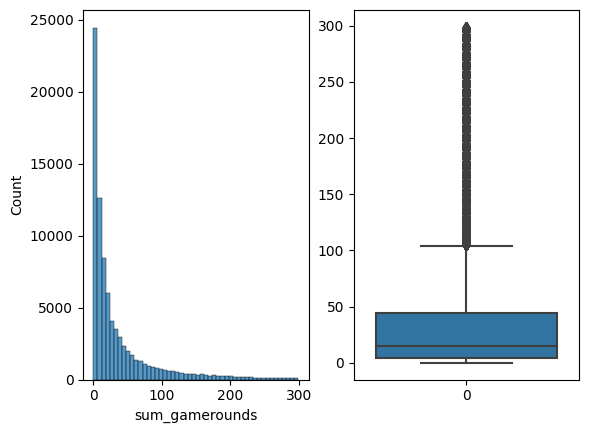

In [12]:
plt.subplot(1, 2, 1)
sns.histplot(data=df_clean, x='sum_gamerounds', bins=50)
plt.subplot(1, 2, 2)
sns.boxplot(data=df_clean['sum_gamerounds'])

<p><font align = 'justify' size="8" color="Green" face="Calibri" color="RedOrange">Analisys</font></p>

In [13]:
sample_a = df_clean[df_clean['version'] == 'gate_30']
sample_b = df_clean[df_clean['version'] == 'gate_40']

In [14]:
b = bs.bootstrap_ab(sample_a['sum_gamerounds'].values, sample_b['sum_gamerounds'].values, stat_func=bs_stats.mean, compare_func=bs_compare.difference, alpha=0.05, num_iterations=5_000)

In [15]:
print(b.lower_bound, b.upper_bound)

-0.7205501367188424 0.7119263680750808


In [16]:
# Распределение не нормальное
result = st.mannwhitneyu(sample_a['sum_gamerounds'], sample_b['sum_gamerounds'])
print(result)

MannwhitneyuResult(statistic=888381416.0, pvalue=0.07557696030116652)


<p><font align = 'justify' size="8" color="Green" face="Calibri" color="RedOrange">Conclusion</font></p>
<p align = 'justify'><font size="3" color="DarkBlue" face="Calibri"><b>H0 подтверждается => Не выявлены статистически значимые различия между 'gate_30' и 'gate_40'.<br>
Рекомендуется сохранить базовый вариант.</b></font></p>